# Winter 2022 Data Science Intern Challenge

Internship Application Link: [Data Science Intern (Remote) - Winter 2022](https://www.shopify.com/careers/data-science-intern-remote-winter-2022-4475e105)  
DS Challenge Link: [Winter 2022 Data Science Intern Challenge](https://docs.google.com/document/d/13VCtoyto9X1PZ74nPI4ZEDdb8hF8LAlcmLH1ZTHxKxE/edit#)

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Question 1  
[Dataset](https://docs.google.com/spreadsheets/d/16i38oonuX1y1g7C_UAmiK9GkY7cS-64DfiDMNiR41LM/edit#gid=0)

In [2]:
# Load the dataset
df = pd.read_excel("2019 Winter Data Science Intern Challenge Data Set.xlsx")

# Check dimension of data frame and show head of dataframe
print(df.shape)
df.head()

(5000, 7)


,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56.190
1,2,92,925,90,1,cash,2017-03-03 17:38:51.999
2,3,44,861,144,1,cash,2017-03-14 04:23:55.595
3,4,18,935,156,1,credit_card,2017-03-26 12:43:36.649
4,5,18,883,156,1,credit_card,2017-03-01 04:35:10.773


In [3]:
# Summary of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   order_id        5000 non-null   int64         
 1   shop_id         5000 non-null   int64         
 2   user_id         5000 non-null   int64         
 3   order_amount    5000 non-null   int64         
 4   total_items     5000 non-null   int64         
 5   payment_method  5000 non-null   object        
 6   created_at      5000 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(5), object(1)
memory usage: 273.6+ KB


In [4]:
# Statistical summary of the data
df.describe()

,order_id,shop_id,user_id,order_amount,total_items
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000
mean,2500.500000,50.078800,849.092400,3145.128000,8.78720
std,1443.520003,29.006118,87.798982,41282.539349,116.32032
min,1.000000,1.000000,607.000000,90.000000,1.00000
25%,1250.750000,24.000000,775.000000,163.000000,1.00000
50%,2500.500000,50.000000,849.000000,284.000000,2.00000
75%,3750.250000,75.000000,925.000000,390.000000,3.00000
max,5000.000000,100.000000,999.000000,704000.000000,2000.00000


In this statistical summary table, we can see that the mean of order_amount is 3145.13 dollars which can also be interpreted as the average order value (revenue divided by number of orders).

But here we also notice that the maximum order_amount is 704000 dollars and maximum total_items is 2000, we can assume that there are two types of transactions, business-to-consumer (B2C) and business-to-business (B2B).

In [6]:
# Count number of items customers usually purchase
df.total_items.value_counts()

2       1832
1       1830
3        941
4        293
5         77
2000      17
6          9
8          1
Name: total_items, dtype: int64

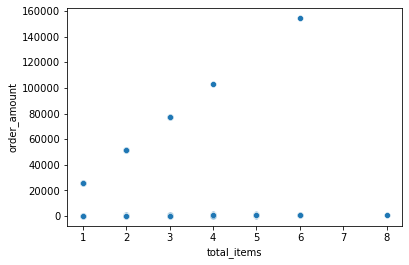

In [7]:
# Scatterplot of total_items vs. order_amount w/ total_items less than 2000
sns.scatterplot(x='total_items', y='order_amount', data=df[df['total_items']<2000]);

Through this graph, we notice that there are items where their single price exceed 20000 dollars. We'll take a further look below.

In [8]:
# Average price per item
(df['order_amount']/df['total_items']).describe()

count     5000.000000
mean       387.742800
std       2441.963725
min         90.000000
25%        133.000000
50%        153.000000
75%        169.000000
max      25725.000000
dtype: float64

In [9]:
# Check where order_amount = 25752
df[df['order_amount'] == 25725]

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
160,161,78,990,25725,1,credit_card,2017-03-12 05:56:56.834
1056,1057,78,800,25725,1,debit,2017-03-15 10:16:44.830
1193,1194,78,944,25725,1,debit,2017-03-16 16:38:25.551
1204,1205,78,970,25725,1,credit_card,2017-03-17 22:32:21.438
1384,1385,78,867,25725,1,cash,2017-03-17 16:38:06.279
1419,1420,78,912,25725,1,cash,2017-03-30 12:23:42.551
1452,1453,78,812,25725,1,credit_card,2017-03-17 18:09:54.089
2270,2271,78,855,25725,1,credit_card,2017-03-14 23:58:21.635
2548,2549,78,861,25725,1,cash,2017-03-17 19:35:59.663
2773,2774,78,890,25725,1,cash,2017-03-26 10:36:43.445


In [10]:
# Check item price for shop_id 78
df[df['shop_id'] == 78]['order_amount'] / df[df['shop_id'] == 78]['total_items']

160     25725.0
490     25725.0
493     25725.0
511     25725.0
617     25725.0
691     25725.0
1056    25725.0
1193    25725.0
1204    25725.0
1259    25725.0
1384    25725.0
1419    25725.0
1452    25725.0
1529    25725.0
2270    25725.0
2452    25725.0
2492    25725.0
2495    25725.0
2512    25725.0
2548    25725.0
2564    25725.0
2690    25725.0
2773    25725.0
2818    25725.0
2821    25725.0
2906    25725.0
2922    25725.0
3085    25725.0
3101    25725.0
3151    25725.0
3167    25725.0
3403    25725.0
3440    25725.0
3705    25725.0
3724    25725.0
3780    25725.0
4040    25725.0
4079    25725.0
4192    25725.0
4311    25725.0
4412    25725.0
4420    25725.0
4505    25725.0
4584    25725.0
4715    25725.0
4918    25725.0
dtype: float64

The order_amount for shop_id 78 is $ 25725 per item. Here, we can assume that this is a bulk order.

Now that we know that shop_id 78 sells in bulk, and where total_items = 2000 buys in bulk too. These will be our B2B orders.

In [11]:
# Business-to-business orders
B2B = pd.concat([df[df['shop_id'] == 78], df[df['total_items'] == 2000]])
B2B.describe()

,order_id,shop_id,user_id,order_amount,total_items
count,63.000000,63.000000,63.000000,63.000000,63.000000
mean,2574.841270,68.285714,797.380952,225901.587302,541.079365
std,1409.031402,16.107931,135.683506,293846.276600,894.029503
min,16.000000,42.000000,607.000000,25725.000000,1.000000
25%,1402.500000,42.000000,607.000000,25725.000000,1.000000
50%,2691.000000,78.000000,818.000000,51450.000000,2.000000
75%,3715.500000,78.000000,913.500000,704000.000000,2000.000000
max,4919.000000,78.000000,997.000000,704000.000000,2000.000000


In [12]:
# Business-to-consumer orders
B2C = df.drop(B2B.index)
B2C.describe()

,order_id,shop_id,user_id,order_amount,total_items
count,4937.000000,4937.000000,4937.000000,4937.000000,4937.000000
mean,2499.551347,49.846465,849.752279,302.580514,1.994734
std,1444.069407,29.061131,86.840313,160.804912,0.982821
min,1.000000,1.000000,700.000000,90.000000,1.000000
25%,1248.000000,24.000000,775.000000,163.000000,1.000000
50%,2497.000000,50.000000,850.000000,284.000000,2.000000
75%,3751.000000,74.000000,925.000000,387.000000,3.000000
max,5000.000000,100.000000,999.000000,1760.000000,8.000000


In [13]:
# Total revenue
df['order_amount'].sum()

15725640

**Answer**  
**a.** The initial calculation of 3145.13 dollars seems to be calculated using the total order amount divided by number of orders. However, it did not take into consideration the bulk orders. If we were to separate the dataset into business-to-business (B2B) and business-to-consumer (B2C), we can get an average order value of 225901.59 dollars for B2B transaction and an average order value of 302.58 dollars for B2C transaction.

**b.** Since we have limited information about this dataset and we would have to further determine which transactions should be considered as B2B orders. For example, if total items is greater than 5 and user makes multiple orders within a month, would it be considered B2B? Thus, I would report total revenue for this dataset.

**c.** The value for total revenue is $15,725,640 dollars.

---

## Question 2  
[SQL Challenge](https://docs.google.com/spreadsheets/d/16i38oonuX1y1g7C_UAmiK9GkY7cS-64DfiDMNiR41LM/edit#gid=0)

**a. How many orders were shipped by Speedy Express in total?**

``` mysql
SELECT DISTINCT COUNT(OrderID) AS 'Orders Shipped by Speedy Express'
FROM Orders o
JOIN Shippers s
ON o.ShipperID = s.ShipperID
WHERE ShipperName = 'Speedy Express';
```

**Answer:** 54

|Orders Shipped by Speedy Express|
|:---|
|54|

___

**b. What is the last name of the employee with the most orders?**

``` mysql
SELECT LastName
FROM Orders o
JOIN Employees e
ON o.EmployeeID = e.EmployeeID
GROUP BY o.EmployeeID
ORDER BY COUNT(*) DESC
LIMIT 1;
```

**Answer:** Peacock

|LastName|
|:---|
|Peacock|

**c. What product was ordered the most by customers in Germany?**

``` mysql
SELECT od.ProductID, ProductName, SUM(Quantity) AS 'Total Ordered Amount'
FROM Orders o
JOIN Customers c
ON o.CustomerID = c.CustomerID
JOIN OrderDetails od
ON o.OrderID = od.OrderID
JOIN Products p
ON od.ProductID = p.ProductID
WHERE Country = 'Germany'
GROUP BY od.ProductID
ORDER BY SUM(Quantity) DESC
LIMIT 1;
```

**Answer:**  Boston Crab Meat

|ProductID|ProductName|Total Ordered Amount|
|:---|:---|:---|
|40|Boston Crab Meat|160|